In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
df = pd.concat([train_df,test_df])
df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
12245,fffe3900310034003700,2008-10-02,Female,Service,Yes,1.0,2.0,6.1,NaN
12246,fffe32003600330034003000,2008-03-31,Female,Product,Yes,2.0,4.0,5.9,NaN
12247,fffe31003800340039003000,2008-02-12,Male,Service,No,4.0,7.0,9.6,NaN
12248,fffe32003600380031003800,2008-02-06,Male,Service,No,3.0,6.0,6.7,NaN


###REVIEW
#ABOUT EMPLOYEE BURNOUT
*Burn out can be defined as state of chronic physical,emotional and mental exhaustion causes by prolong stress,high workload,lack of support,unrealistic expectations from management,poor worklife balance etc.
#importance of using data to predict and prevent burnout
*it helps to promote work life balance,flexible hours,remote work options and respecting personal time
*it helps to recognise and reward effort
*its helps the management to invest in leadership training
*it helps HR and managers to intervene in situation before it escalate
it helps managers to segment employee into risk categories(low,high and medium)

In [3]:
import os
print(os.getcwd())

C:\Users\DEll 7490


In [4]:
df.isnull()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
12245,False,False,False,False,False,False,False,False,True
12246,False,False,False,False,False,False,False,False,True
12247,False,False,False,False,False,False,False,False,True
12248,False,False,False,False,False,False,False,False,True


In [5]:
df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,35000.000000,33619.000000,32883.000000,21626.000000
mean,2.177514,4.473185,5.725350,0.452005
std,1.134339,2.046623,1.918292,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.500000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35000 entries, 0 to 12249
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           35000 non-null  object 
 1   Date of Joining       35000 non-null  object 
 2   Gender                35000 non-null  object 
 3   Company Type          35000 non-null  object 
 4   WFH Setup Available   35000 non-null  object 
 5   Designation           35000 non-null  float64
 6   Resource Allocation   33619 non-null  float64
 7   Mental Fatigue Score  32883 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.7+ MB


In [7]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(35000, 9)

In [10]:
df.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [11]:
### Generating descriptive statistics for all variable
print("Descriptive statistics for numerical variables:")
print(df.describe())

Descriptive statistics for numerical variables:
        Designation  Resource Allocation  Mental Fatigue Score     Burn Rate
count  35000.000000         33619.000000          32883.000000  21626.000000
mean       2.177514             4.473185              5.725350      0.452005
std        1.134339             2.046623              1.918292      0.198226
min        0.000000             1.000000              0.000000      0.000000
25%        1.000000             3.000000              4.500000      0.310000
50%        2.000000             4.000000              5.900000      0.450000
75%        3.000000             6.000000              7.100000      0.590000
max        5.000000            10.000000             10.000000      1.000000


In [12]:
###Generaring descriptive statistics for categorical variables 
print("\nDescriptive statistics for categorical variables:")
print(df.describe(include=['object','category']))


Descriptive statistics for categorical variables:
                     Employee ID Date of Joining  Gender Company Type  \
count                      35000           35000   35000        35000   
unique                     35000             366       2            2   
top     fffe32003000360033003200      2008-01-06  Female      Service   
freq                           1             129   18353        22837   

       WFH Setup Available  
count                35000  
unique                   2  
top                    Yes  
freq                 18928  


In [13]:
###To get info about all variables(numerical+categorical)
print("\nComplete descriptive statistic for all variables:")
print(df.describe(include='all'))


Complete descriptive statistic for all variables:
                     Employee ID Date of Joining  Gender Company Type  \
count                      35000           35000   35000        35000   
unique                     35000             366       2            2   
top     fffe32003000360033003200      2008-01-06  Female      Service   
freq                           1             129   18353        22837   
mean                         NaN             NaN     NaN          NaN   
std                          NaN             NaN     NaN          NaN   
min                          NaN             NaN     NaN          NaN   
25%                          NaN             NaN     NaN          NaN   
50%                          NaN             NaN     NaN          NaN   
75%                          NaN             NaN     NaN          NaN   
max                          NaN             NaN     NaN          NaN   

       WFH Setup Available   Designation  Resource Allocation  \
count  

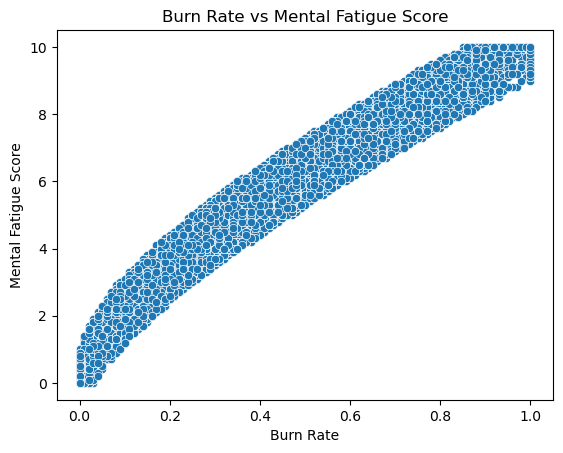

In [28]:
sns.scatterplot(x='Burn Rate',y='Mental Fatigue Score',data=df)
plt.title('Burn Rate vs Mental Fatigue Score')
plt.show()

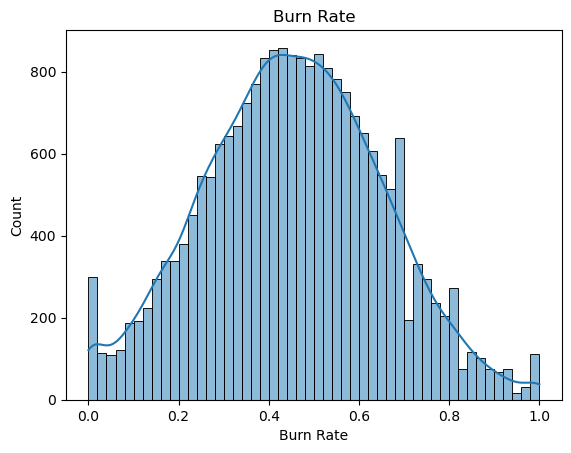

In [27]:
### Histogram
sns.histplot(df['Burn Rate'],kde=True)
plt.title('Burn Rate')
plt.show()
             

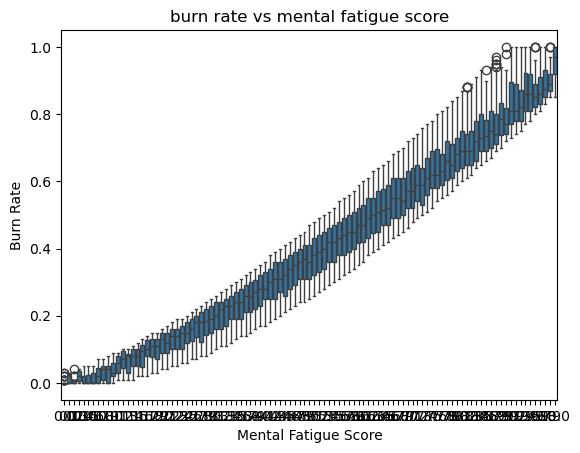

In [26]:
###boxplot
sns.boxplot(x='Mental Fatigue Score',y='Burn Rate',data=df)
plt.title('burn rate vs mental fatigue score')
plt.show()
          

In [15]:
#import library
from sklearn.impute import SimpleImputer
#initialize the imputer
imputer = SimpleImputer(strategy='median')
numerical_cols = df.select_dtypes(include=np.number).columns
#create a copy 
df_imputed_all = df.copy()
#fit and transform
df_imputed_all[numerical_cols] = imputer.fit_transform(df[numerical_cols])
df_imputed_all


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,4.0,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
12245,fffe3900310034003700,2008-10-02,Female,Service,Yes,1.0,2.0,6.1,0.45
12246,fffe32003600330034003000,2008-03-31,Female,Product,Yes,2.0,4.0,5.9,0.45
12247,fffe31003800340039003000,2008-02-12,Male,Service,No,4.0,7.0,9.6,0.45
12248,fffe32003600380031003800,2008-02-06,Male,Service,No,3.0,6.0,6.7,0.45


In [16]:
df = df[~df.index.duplicated(keep = 'first')]

In [17]:
### one hot encoding for handling of missing data
#import libraries
from sklearn.preprocessing import OneHotEncoder
#initialize one-hot encoder
encoder = OneHotEncoder(sparse_output=False)
#list of columns to one-hot encode
columns_to_OneHot =['Gender','Company Type','WFH Setup Available']
#fit and transform
encoded_data = encoder.fit_transform(df[columns_to_OneHot])
encoded_df = pd.DataFrame(encoded_data,columns = encoder.get_feature_names_out(columns_to_OneHot))
df = pd.concat([df.drop(columns=columns_to_OneHot),encoded_df], axis=1)
df.head()

,Employee ID,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes
0,fffe32003000360033003200,2008-09-30,2.0,3.0,3.8,0.16,1.0,0.0,0.0,1.0,1.0,0.0
1,fffe3700360033003500,2008-11-30,1.0,2.0,5.0,0.36,0.0,1.0,0.0,1.0,0.0,1.0
2,fffe31003300320037003900,2008-03-10,2.0,NaN,5.8,0.49,1.0,0.0,1.0,0.0,0.0,1.0
3,fffe32003400380032003900,2008-11-03,1.0,1.0,2.6,0.20,0.0,1.0,0.0,1.0,0.0,1.0
4,fffe31003900340031003600,2008-07-24,3.0,7.0,6.9,0.52,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
df_imputed_all

In [200]:
###Train/test split
#import libraries
from sklearn.impute import SimpleImputer
#initialize the model
imputer = SimpleImputer(strategy='mean')
imputed_y = SimpleImputer(strategy='mean')
#fit and transform
x_train_reshaped = x_train.values.reshape(-1,1)
x_train_imputed = imputer.fit_transform(x_train_reshaped)
y_train_reshaped = y_train.values.reshape(-1,1)
y_train_imputed = imputer.fit_transform(y_train_reshaped)
x_test_reshaped = x_test.values.reshape(-1,1)
x_test_imputed = imputed_y.fit_transform(x_test_reshaped)
y_test_reshaped = y_test.values.reshape(-1,1)
y_test_imputed = imputed_y.fit_transform(y_test_reshaped)
from sklearn.model_selection import train_test_split
x = df.drop(['Resource Allocation','Designation'],axis=1)#feature
y = df['Resource Allocation']#target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(18200, 12) (18200,)
(4550, 12) (4550,)


In [18]:
df.drop('Employee ID',axis=1,inplace=True)

In [19]:
df.columns = df.columns.str.strip()

In [20]:
df.columns

Index(['Date of Joining', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate', 'Gender_Female', 'Gender_Male',
       'Company Type_Product', 'Company Type_Service',
       'WFH Setup Available_No', 'WFH Setup Available_Yes'],
      dtype='object')

In [21]:
#import library
from datetime import date
#convert doj to datetime
df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])
#functin to calculate tenure in years and months
def calculate_tenure(doj):
    today = date.today()
    years = today.year - doj.year
    months = today.month - doj.month
    if today.day<doj.day:
        months-=1
    if months < 0:
        years-= 1
        months+= 12
    return f"{years}years,{months}months"
#create new feature
df['Tenure'] = df['Date of Joining'].apply([calculate_tenure],axis=1)
df

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes,Tenure
0,2008-09-30,2.0,3.0,3.8,0.16,1.0,0.0,0.0,1.0,1.0,0.0,"16years,10months"
1,2008-11-30,1.0,2.0,5.0,0.36,0.0,1.0,0.0,1.0,0.0,1.0,"16years,8months"
2,2008-03-10,2.0,NaN,5.8,0.49,1.0,0.0,1.0,0.0,0.0,1.0,"17years,4months"
3,2008-11-03,1.0,1.0,2.6,0.20,0.0,1.0,0.0,1.0,0.0,1.0,"16years,9months"
4,2008-07-24,3.0,7.0,6.9,0.52,1.0,0.0,0.0,1.0,1.0,0.0,"17years,0months"
...,...,...,...,...,...,...,...,...,...,...,...,...
22745,2008-12-30,1.0,3.0,NaN,0.41,1.0,0.0,0.0,1.0,1.0,0.0,"16years,7months"
22746,2008-01-19,3.0,6.0,6.7,0.59,1.0,0.0,1.0,0.0,0.0,1.0,"17years,6months"
22747,2008-11-05,3.0,7.0,NaN,0.72,0.0,1.0,0.0,1.0,0.0,1.0,"16years,9months"
22748,2008-01-10,2.0,5.0,5.9,0.52,1.0,0.0,0.0,1.0,1.0,0.0,"17years,6months"


In [29]:
df = df.drop(columns=["Tenure"])
df

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes,Joining_month,Joining_day,tenure_in_months
0,2008,2.0,3.0,3.8,0.16,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0
1,2008,1.0,2.0,5.0,0.36,0.0,1.0,0.0,1.0,0.0,1.0,1,1,0
2,2008,2.0,NaN,5.8,0.49,1.0,0.0,1.0,0.0,0.0,1.0,1,1,0
3,2008,1.0,1.0,2.6,0.20,0.0,1.0,0.0,1.0,0.0,1.0,1,1,0
4,2008,3.0,7.0,6.9,0.52,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22745,2008,1.0,3.0,NaN,0.41,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0
22746,2008,3.0,6.0,6.7,0.59,1.0,0.0,1.0,0.0,0.0,1.0,1,1,0
22747,2008,3.0,7.0,NaN,0.72,0.0,1.0,0.0,1.0,0.0,1.0,1,1,0
22748,2008,2.0,5.0,5.9,0.52,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0


In [22]:
df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])
df['Date of Joining'] = df['Date of Joining'].dt.year
df['Joining_month'] = pd.to_datetime(df['Date of Joining']).dt.month
df['Joining_day'] = pd.to_datetime(df['Date of Joining']).dt.day
df

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes,Tenure,Joining_month,Joining_day
0,2008,2.0,3.0,3.8,0.16,1.0,0.0,0.0,1.0,1.0,0.0,"16years,10months",1,1
1,2008,1.0,2.0,5.0,0.36,0.0,1.0,0.0,1.0,0.0,1.0,"16years,8months",1,1
2,2008,2.0,NaN,5.8,0.49,1.0,0.0,1.0,0.0,0.0,1.0,"17years,4months",1,1
3,2008,1.0,1.0,2.6,0.20,0.0,1.0,0.0,1.0,0.0,1.0,"16years,9months",1,1
4,2008,3.0,7.0,6.9,0.52,1.0,0.0,0.0,1.0,1.0,0.0,"17years,0months",1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22745,2008,1.0,3.0,NaN,0.41,1.0,0.0,0.0,1.0,1.0,0.0,"16years,7months",1,1
22746,2008,3.0,6.0,6.7,0.59,1.0,0.0,1.0,0.0,0.0,1.0,"17years,6months",1,1
22747,2008,3.0,7.0,NaN,0.72,0.0,1.0,0.0,1.0,0.0,1.0,"16years,9months",1,1
22748,2008,2.0,5.0,5.9,0.52,1.0,0.0,0.0,1.0,1.0,0.0,"17years,6months",1,1


In [23]:
def tenure_to_months(tenure_string):
    years = 0
    months = 0

    parts = tenure_string.split()
    if 'year' in parts:
       years = int(parts[parts.index('year') - 1])

    if 'months' in parts:
        months = int(parts[parts.index('months') - 1])
    
    return years * 12 + months

df["tenure_in_months"] = df["Tenure"].apply(tenure_to_months)
df

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes,Tenure,Joining_month,Joining_day,tenure_in_months
0,2008,2.0,3.0,3.8,0.16,1.0,0.0,0.0,1.0,1.0,0.0,"16years,10months",1,1,0
1,2008,1.0,2.0,5.0,0.36,0.0,1.0,0.0,1.0,0.0,1.0,"16years,8months",1,1,0
2,2008,2.0,NaN,5.8,0.49,1.0,0.0,1.0,0.0,0.0,1.0,"17years,4months",1,1,0
3,2008,1.0,1.0,2.6,0.20,0.0,1.0,0.0,1.0,0.0,1.0,"16years,9months",1,1,0
4,2008,3.0,7.0,6.9,0.52,1.0,0.0,0.0,1.0,1.0,0.0,"17years,0months",1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22745,2008,1.0,3.0,NaN,0.41,1.0,0.0,0.0,1.0,1.0,0.0,"16years,7months",1,1,0
22746,2008,3.0,6.0,6.7,0.59,1.0,0.0,1.0,0.0,0.0,1.0,"17years,6months",1,1,0
22747,2008,3.0,7.0,NaN,0.72,0.0,1.0,0.0,1.0,0.0,1.0,"16years,9months",1,1,0
22748,2008,2.0,5.0,5.9,0.52,1.0,0.0,0.0,1.0,1.0,0.0,"17years,6months",1,1,0


In [24]:
df_numerical = df[['Designation','Resource Allocation','Mental Fatigue Score','Burn Rate']]
df_numerical

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2.0,3.0,3.8,0.16
1,1.0,2.0,5.0,0.36
2,2.0,NaN,5.8,0.49
3,1.0,1.0,2.6,0.20
4,3.0,7.0,6.9,0.52
...,...,...,...,...
22745,1.0,3.0,NaN,0.41
22746,3.0,6.0,6.7,0.59
22747,3.0,7.0,NaN,0.72
22748,2.0,5.0,5.9,0.52


In [32]:
###Normalization
from sklearn.preprocessing import MinMaxScaler
#initialize the model
scaler = MinMaxScaler()
df_numerical = df.select_dtypes(include=['int64','float64'])
imputer = SimpleImputer(strategy='median')
df_numerical_imputed = imputer.fit_transform(df_numerical_imputed)
#fit and transform
df_scaled_numerical_imputed = scaler.fit_transform(df_numerical_imputed)
print(pd.DataFrame(df_scaled_numerical_imputed,columns=df_numerical.columns))

       Designation  Resource Allocation  Mental Fatigue Score  Burn Rate  \
0              0.4             0.222222                  0.38       0.16   
1              0.2             0.111111                  0.50       0.36   
2              0.4             0.333333                  0.58       0.49   
3              0.2             0.000000                  0.26       0.20   
4              0.6             0.666667                  0.69       0.52   
...            ...                  ...                   ...        ...   
22745          0.2             0.222222                  0.59       0.41   
22746          0.6             0.555556                  0.67       0.59   
22747          0.6             0.666667                  0.59       0.72   
22748          0.4             0.444444                  0.59       0.52   
22749          0.6             0.555556                  0.78       0.61   

       Gender_Female  Gender_Male  Company Type_Product  Company Type_Service  \
0     

In [ ]:
df

In [197]:
df_cleaned=df.drop('Date of Joining',axis=1)
df_cleaned

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes,Joining_month,Joining_day,tenure_in_months
0,2.0,3.0,3.8,0.16,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0
1,1.0,2.0,5.0,0.36,0.0,1.0,0.0,1.0,0.0,1.0,1,1,0
2,2.0,NaN,5.8,0.49,1.0,0.0,1.0,0.0,0.0,1.0,1,1,0
3,1.0,1.0,2.6,0.20,0.0,1.0,0.0,1.0,0.0,1.0,1,1,0
4,3.0,7.0,6.9,0.52,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22745,1.0,3.0,NaN,0.41,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0
22746,3.0,6.0,6.7,0.59,1.0,0.0,1.0,0.0,0.0,1.0,1,1,0
22747,3.0,7.0,NaN,0.72,0.0,1.0,0.0,1.0,0.0,1.0,1,1,0
22748,2.0,5.0,5.9,0.52,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0


In [217]:
###sampling of training and testin data
x_full = df_cleaned.drop('Resource Allocation',axis=1)
y_full = df_cleaned['Resource Allocation'].copy()
mean_value = np.nanmean(x_full)
x_full[np.isnan(x_full)] = mean_value
mean_value = np.nanmean(y_full)
y_full[np.isnan(y_full)] = mean_value
x_train_imputed,y_train_imputed,x_test_imputed,y_test_imputed = train_test_split(x_full,y_full,train_size=1000,test_size=1000,random_state=42,stratify=y_full)

In [226]:
print(f"shape of x_full:{x_full.shape}")

shape of x_full:(22750, 12)


In [227]:
print(f"shape of y_full:{y_full.shape}")

shape of y_full:(22750,)


In [228]:
print(f"shape of y_pred:{y_pred.shape}")

shape of y_pred:(22750,)


intercept: 0.6165240526752744
coefficient: [ 1.15505014  0.11726748  1.52404054 -0.04205246  0.04205246 -0.00364916
  0.00364916  0.09885128 -0.09885128  0.          0.          0.        ]


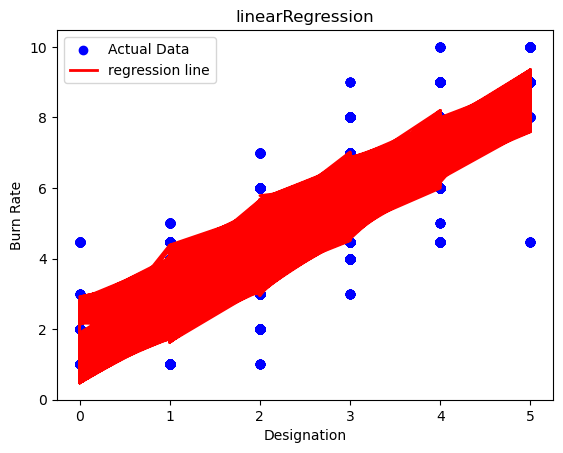

In [248]:
###linear regression
#import library
from sklearn.linear_model import LinearRegression
#initialize the model
model = LinearRegression()
#fit and transform the model
model.fit(x_full,y_full)
#prediction
y_pred = model.predict(x_full)
#output
print("intercept:",model.intercept_)
print("coefficient:",model.coef_)
#plotting
plt.scatter(x_full['Designation'],y_full,color ='blue',label='Actual Data')
plt.plot(x_full['Designation'],y_pred,color ='red',linewidth=2,label='regression line')
plt.xlabel('Designation')
plt.ylabel('Burn Rate')
plt.title('linearRegression')
plt.legend()
plt.show()

In [138]:
print(f"shape of x_train_imputed:{x_train_imputed.shape}")

shape of x_train_imputed:(18200, 12)


In [139]:
print(f"shape of y_train_imputed:{y_train_imputed.shape}")

shape of y_train_imputed:(18200, 1)


In [86]:
print(f"shape of y_pred:{y_pred.shape}")

shape of y_pred:(4550,)


In [73]:
###Random forest 
#import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
#initialize the model
model_rf = RandomForestRegressor()
#fit and transform
model_rf.fit(x_train_imputed,y_train_imputed.ravel())
#prediction
y_pred = model_rf.predict(x_test_imputed)
#Evaluate
print("R2 Score:",r2_score(y_test_imputed.ravel(),y_pred))
print("MSE:",mean_squared_error(y_test_imputed.ravel(),y_pred))


R2 Score: 0.5998471727476892
MSE: 1.533660705464037


In [79]:
###Gradient boosting for regressor
#import libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
#initialize the model
gb_model = GradientBoostingRegressor()
#fit and train
gb_model.fit(x_train_imputed,y_train_imputed.ravel())
#make prediction
y_pred =gb_model.predict(x_test_imputed)
#evaluate
print("MSE:",mean_squared_error(y_test_imputed.ravel(),y_pred))


MSE: 1.1912880878237482


In [81]:
###Gradient boosting for regressor(hyperparameter tunning)
#import libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
#initialize the model
gb_model = GradientBoostingRegressor(n_estimators=200,learning_rate=0.5,max_depth=3,random_state=42)
#fit and train
gb_model.fit(x_train_imputed,y_train_imputed.ravel())
#make prediction
y_pred = gb_model.predict(x_test_imputed)
#evaluate
print("MSE:",mean_squared_error(y_test_imputed,y_pred))
print("R2:",r2_score,(y_test_imputed,y_pred))


MSE: 1.2295620294504732
R2: <function r2_score at 0x00000254AA5209A0> (array([[3.],
       [6.],
       [4.],
       ...,
       [4.],
       [7.],
       [4.]]), array([2.44305181, 4.06887862, 3.99634659, ..., 5.95063813, 7.45911303,
       4.32650169]))


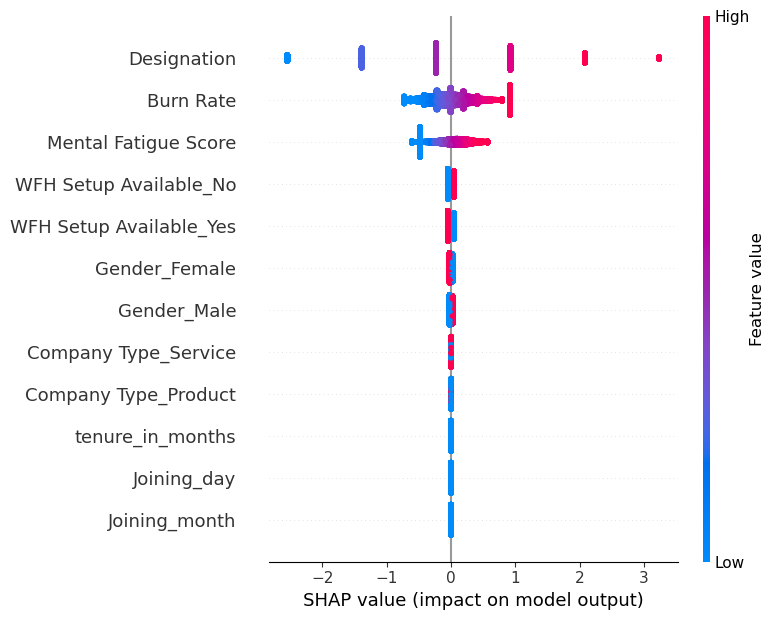

In [258]:
###shap
#import library
import shap
#initialize shap explainer
explainer = shap.Explainer(model,x_full)
shap_values = explainer.shap_values(x_full)
#summary plot(feature importance across dataset)
shap.summary_plot(shap_values,x_full)

###Insight and recommendation
*feature importance:the features are listed on the y-axis,order by their overall importance.in this case designation and Burn Rate are the most importance features.
*feature impact:Deisgnation and Burn rate is the MOST important feature on the data of test and train data and least important data is joining_month
#Recommendation
1.The company should create a workplan/workflow those with higher mental fatigue score to compulsory timeoff and vacation
2.reduce the workload on those with higher mental fatigue score
3.The company can hire an assistant for those with higher mental fatigue score